#TPU

In [1]:
!pip install deplacy vncorenlp
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
from vncorenlp import VnCoreNLP
vnp=VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="ner")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 10.1 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=4296fb8b4b7febfb96be4920eb6a1cfc31583a553c931a8ee959aac9fe0faf27
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp
Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 1), reused 40 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf

#Load Model PhoBERT

In [4]:
!pip3 install fairseq --quiet
!pip3 install fastbpe --quiet
!pip3 install vncorenlp --quiet
!pip3 install transformers --quiet

     |████████████████████████████████| 11.0 MB 7.1 MB/s 
     |████████████████████████████████| 92 kB 12.0 MB/s 
     |████████████████████████████████| 123 kB 63.5 MB/s 
     |████████████████████████████████| 236 kB 59.9 MB/s 
     |████████████████████████████████| 112 kB 50.8 MB/s 
     |████████████████████████████████| 596 kB 61.1 MB/s 
     |████████████████████████████████| 4.4 MB 6.7 MB/s 
     |████████████████████████████████| 6.6 MB 41.1 MB/s 
     |████████████████████████████████| 101 kB 12.9 MB/s 


In [5]:
!wget https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
!tar -xzvf PhoBERT_base_fairseq.tar.gz

--2022-07-01 14:55:40--  https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
Resolving public.vinai.io (public.vinai.io)... 52.84.162.17, 52.84.162.116, 52.84.162.36, ...
Connecting to public.vinai.io (public.vinai.io)|52.84.162.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1243308020 (1.2G) [application/x-tar]
Saving to: ‘PhoBERT_base_fairseq.tar.gz’

PhoBERT_base_fairse 100%[===================>]   1.16G  23.8MB/s    in 53s     

2022-07-01 14:56:34 (22.6 MB/s) - ‘PhoBERT_base_fairseq.tar.gz’ saved [1243308020/1243308020]

PhoBERT_base_fairseq/
PhoBERT_base_fairseq/bpe.codes
PhoBERT_base_fairseq/model.pt
PhoBERT_base_fairseq/dict.txt


In [6]:
# Load the model in fairseq
from fairseq.models.roberta import RobertaModel
phoBERT = RobertaModel.from_pretrained('PhoBERT_base_fairseq', checkpoint_file='model.pt')
phoBERT.eval()  # disable dropout (or leave in train mode to finetune

2022-07-01 14:56:55 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-07-01 14:56:55 | INFO | fairseq.file_utils | loading archive file PhoBERT_base_fairseq
2022-07-01 14:57:08 | INFO | fairseq.tasks.masked_lm | dictionary: 64000 types
2022-07-01 14:57:16 | INFO | fairseq.models.roberta.model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 1, 'log_format': 'simple', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': '', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_wind

RobertaHubInterface(
  (model): RobertaModel(
    (encoder): RobertaEncoder(
      (sentence_encoder): TransformerEncoder(
        (dropout_module): FairseqDropout()
        (embed_tokens): Embedding(64001, 768, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(258, 768, padding_idx=1)
        (layernorm_embedding): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (layers): ModuleList(
          (0): TransformerEncoderLayerBase(
            (self_attn): MultiheadAttention(
              (dropout_module): FairseqDropout()
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout_module

In [7]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/VnCoreNLP/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

from fairseq.data.encoders.fastbpe import fastBPE  
from fairseq import options  
import numpy as np
import pandas as pd

2022-07-01 14:57:17 | INFO | vncorenlp.vncorenlp | Starting server on: http://127.0.0.1:39651
2022-07-01 14:57:17 | INFO | vncorenlp.vncorenlp | Server ID: 515
2022-07-01 14:57:17 | INFO | vncorenlp.vncorenlp | Waiting until the server is available...
2022-07-01 14:57:22 | INFO | vncorenlp.vncorenlp | The server is now available on: http://127.0.0.1:39651


#Load Data

In [8]:
df=pd.read_excel('/content/drive/MyDrive/DS310.M11/Data/dataset.xlsx')
X=df.loc[:,'Comment']
y=df.loc[:,'Label']
y.unique()

array([1, 0, 2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Tokenize

In [11]:
max_sequence_length = 100


def convert_lines(lines, vocab, bpe):
  '''
  lines: list các văn bản input
  vocab: từ điển dùng để encoding subwords
  bpe: 
  '''
  # Khởi tạo ma trận output
  outputs = np.zeros((len(lines), max_sequence_length)) # --> shape (number_lines, max_seq_len)
  # Index của các token cls (đầu câu), eos (cuối câu), padding (padding token)
  cls_id = 0
  eos_id = 2
  pad_id = 1

  for idx, row in tqdm(enumerate(lines), total=len(lines)): 
    # Mã hóa subwords theo byte pair encoding(bpe)
    subwords = bpe.encode('<s> '+ row +' </s>')
    input_ids = vocab.encode_line(subwords, append_eos=False, add_if_not_exist=False).long().tolist()
    # Truncate input nếu độ dài vượt quá max_seq_len
    if len(input_ids) > max_sequence_length: 
      input_ids = input_ids[:max_sequence_length] 
      input_ids[-1] = eos_id
    else:
      # Padding nếu độ dài câu chưa bằng max_seq_len
      input_ids = input_ids + [pad_id, ]*(max_sequence_length - len(input_ids))
    
    outputs[idx,:] = np.array(input_ids)
  return outputs

#Build Model

In [12]:
# Load the model in fairseq
from fairseq.models.roberta import RobertaModel
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary

phoBERT_cls = RobertaModel.from_pretrained('PhoBERT_base_fairseq', checkpoint_file='model.pt')
phoBERT_cls.eval()  # disable dropout (or leave in train model to finetune)

# Load BPE
class BPE():
  bpe_codes = 'PhoBERT_base_fairseq/bpe.codes'

args = BPE()
phoBERT_cls.bpe = fastBPE(args) #Incorporate the BPE encoder into PhoBERT

# Add header cho classification với số lượng classes = 3
phoBERT_cls.register_classification_head('new_task', num_classes=3)

2022-07-01 14:57:24 | INFO | fairseq.file_utils | loading archive file PhoBERT_base_fairseq
2022-07-01 14:57:28 | INFO | fairseq.tasks.masked_lm | dictionary: 64000 types
2022-07-01 14:57:32 | INFO | fairseq.models.roberta.model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 1, 'log_format': 'simple', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': '', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quan

##Tokenize Input và Output
* Chuẩn bị X input: Tokenize nội dung các văn bản sang chuỗi indices.

* Chuẩn bị y output: Encoding các label output thành indices đánh dấu số thứ tự của văn bản.

In [13]:
# Load the model in fairseq
from fairseq.models.roberta import RobertaModel
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary

In [14]:
from tqdm import tqdm
import torch

#max_sequence_length = 13
def convert_lines(lines, vocab, bpe):
  '''
  lines: list các văn bản input
  vocab: từ điển dùng để encoding subwords
  bpe: 
  '''
  # Khởi tạo ma trận output
  outputs = np.zeros((len(lines), max_sequence_length), dtype=np.int32) # --> shape (number_lines, max_seq_len)
  # Index của các token cls (đầu câu), eos (cuối câu), padding (padding token)
  cls_id = 0
  eos_id = 2
  pad_id = 1

  for idx, row in tqdm(enumerate(lines), total=len(lines)): 
    # Mã hóa subwords theo byte pair encoding(bpe)
    subwords = bpe.encode('<s> '+ row +' </s>')
    input_ids = vocab.encode_line(subwords, append_eos=False, add_if_not_exist=False).long().tolist()
    # Truncate input nếu độ dài vượt quá max_seq_len
    if len(input_ids) > max_sequence_length: 
      input_ids = input_ids[:max_sequence_length] 
      input_ids[-1] = eos_id
    else:
      # Padding nếu độ dài câu chưa bằng max_seq_len
      input_ids = input_ids + [pad_id, ]*(max_sequence_length - len(input_ids))
    
    outputs[idx,:] = np.array(input_ids)
  return outputs

# Load the dictionary  
vocab = Dictionary()
vocab.add_from_file("PhoBERT_base_fairseq/dict.txt")

In [15]:
X = convert_lines(X_train, vocab, phoBERT_cls.bpe)
print('X shape: ', X.shape)

100%|██████████| 6040/6040 [00:01<00:00, 4572.54it/s]

X shape:  (6040, 100)


In [16]:
X_dev = convert_lines(X_dev, vocab, phoBERT_cls.bpe)
print('X shape: ', X_dev.shape)

100%|██████████| 1510/1510 [00:00<00:00, 4378.85it/s]

X shape:  (1510, 100)


In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(y_train)
y = lb.fit_transform(y_train)
print(lb.classes_)
print('Top 5 classes indices: ', y[:5])

[0 1 2]
Top 5 classes indices:  [1 1 1 1 1]


In [18]:
y = np.array(y_train)

In [19]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
lb1.fit(y_dev)
y_dev = lb1.fit_transform(y_dev)
print(lb1.classes_)
print('Top 5 classes indices: ', y_dev[:5])

[0 1 2]
Top 5 classes indices:  [1 1 1 2 1]


In [20]:
y_dev = np.array(y_dev)

#Validate Model

Xây dựng hàm đánh giá mô hình theo 2 metric là accuracy và f1_score.

In [21]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def evaluate(logits, targets):
    """
    Đánh giá model sử dụng accuracy và f1 scores.
    Args:
        logits (B,C): torch.LongTensor. giá trị predicted logit cho class output.
        targets (B): torch.LongTensor. actual target indices.
    Returns:
        acc (float): the accuracy score
        f1 (float): the f1 score
    """
    # Tính accuracy score và f1_score
    logits = logits.detach().cpu().numpy()  
    y_pred = np.argmax(logits, axis = 1)
    targets = targets.detach().cpu().numpy()
    f1 = f1_score(targets, y_pred, average='macro')
    acc = accuracy_score(targets, y_pred)

    return acc, f1

In [22]:
def validate(valid_loader, model, device):
    model.eval()
    accs = []
    f1s = []
    with torch.no_grad():
        for x_batch, y_batch in valid_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model.predict('new_task', x_batch)
            logits = torch.exp(outputs)
            acc, f1 = evaluate(logits, y_batch)
            accs.append(acc)
            f1s.append(f1)
    
    mean_acc = np.mean(accs)
    mean_f1 = np.mean(f1s)
    return mean_acc, mean_f1

In [23]:
def trainOnEpoch(train_loader, model, optimizer, epoch, num_epochs, criteria, device, sumepochLosss, log_aggr = 125):
    model.train()
    sum_epoch_loss = 0
    sum_acc = 0
    sum_f1 = 0
    start = time.time()
    for i, (x_batch, y_batch) in enumerate(train_loader):
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      optimizer.zero_grad()
      y_pred = model.predict('new_task', x_batch)
      logits = torch.exp(y_pred)
      acc, f1 = evaluate(logits, y_batch)
      loss = criteria(y_pred, y_batch)
      loss.backward()
      optimizer.step()

      loss_val = loss.item()
      sum_epoch_loss += loss_val
      sum_acc += acc
      sum_f1 += f1
      iter_num = epoch * len(train_loader) + i + 1

      if i % log_aggr == 0:
            print('[TRAIN] epoch %d/%d  observation %d/%d batch loss: %.4f (avg %.4f),  avg acc: %.4f, avg f1: %.4f, (%.2f im/s)'
                % (epoch + 1, num_epochs, i, len(train_loader), loss_val, sum_epoch_loss / (i + 1),  sum_acc/(i+1), sum_f1/(i+1),
                  len(x_batch) / (time.time() - start)))
      start = time.time()

      sumepochLosss.append(sum_epoch_loss / (i + 1))

#Training Model

In [24]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.8 MB/s 


In [36]:
import os
import time
import random
import argparse
import pickle
import numpy as np
from tqdm import tqdm
from os.path import join

import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.autograd import Variable
from torch.backends import cudnn
from sklearn.model_selection import StratifiedKFold

# Load the model in fairseq
from fairseq.models.roberta import RobertaModel
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
from transformers.modeling_utils import * 
from transformers.optimization import *

In [32]:
EPOCHS = 10
BATCH_SIZE = 64
ACCUMULATION_STEPS = 7
LR = 2e-5
LR_DC_STEP = 80
LR_DC = 0.1
CUR_DIR = os.path.dirname(os.getcwd())
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
FOLD = 0
CKPT_PATH2 = 'model_ckpt2'

In [ ]:
if not os.path.exists(CKPT_PATH2):
    os.mkdir(CKPT_PATH2)

# Khởi tạo DataLoader

best_score = 0
sumLoss = []

# Create dataset
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X[:],dtype=torch.long), torch.tensor(y[:],dtype=torch.long))
valid_dataset = torch.utils.data.TensorDataset(torch.tensor(X_dev[:],dtype=torch.long), torch.tensor(y_dev[:],dtype=torch.long))

# Create DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Khởi tạo model:
MODEL_LAST_CKPT = os.path.join(CKPT_PATH2, 'latest_checkpoint.pth')
  
## Load BPE
print('Load BPE')
class BPE():
  bpe_codes = 'PhoBERT_base_fairseq/bpe.codes'

args = BPE()
phoBERT_cls.bpe = fastBPE(args) #Incorporate the BPE encoder into PhoBERT
phoBERT_cls.to(DEVICE)

# Khởi tạo optimizer và scheduler, criteria
print('Init Optimizer, scheduler, criteria')
param_optimizer = list(phoBERT_cls.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

num_train_optimization_steps = int(EPOCHS*len(train_dataset)/BATCH_SIZE/ACCUMULATION_STEPS)
optimizer = AdamW(optimizer_grouped_parameters, lr=LR, correct_bias=False)  # To reproduce BertAdam specific behavior set correct_bias=False
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=num_train_optimization_steps)  # scheduler với linear warmup
scheduler0 = get_constant_schedule(optimizer)  # scheduler với hằng số

optimizer = optim.Adam(phoBERT_cls.parameters(), LR)
criteria = nn.NLLLoss()
scheduler = StepLR(optimizer, step_size = LR_DC_STEP, gamma = LR_DC)
avg_loss = 0.
avg_accuracy = 0.
frozen = True
for epoch in tqdm(range(EPOCHS)):
    # warm up tại epoch đầu tiên, sau epoch đầu sẽ phá băng các layers
    if epoch > 0 and frozen:
        for child in phoBERT_cls.children():
            for param in child.parameters():
                param.requires_grad = True
        frozen = False
        del scheduler0
        torch.cuda.empty_cache()
    # Train model on EPOCH
    print('Epoch: ', epoch)
    trainOnEpoch(train_loader=train_loader, model=phoBERT_cls, optimizer=optimizer, epoch=epoch, num_epochs=EPOCHS, criteria=criteria, device=DEVICE, sumepochLosss = sumLoss, log_aggr=100)
    # scheduler.step(epoch = epoch)
    # Phá băng layers sau epoch đầu tiên
    if not frozen:
        scheduler.step()
    else:
        scheduler0.step()
    optimizer.zero_grad()
    # Validate on validation set
    acc, f1 = validate(valid_loader, phoBERT_cls, device=DEVICE)
    print('Epoch {} validation: acc: {:.4f}, f1: {:.4f} \n'.format(epoch, acc, f1))

    # Store best model checkpoint
    ckpt_dict = {
        'epoch': epoch + 1,
        'state_dict': phoBERT_cls.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    # Save model checkpoint into 'latest_checkpoint.pth.tar'
    torch.save(ckpt_dict, MODEL_LAST_CKPT)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Load BPE
Init Optimizer, scheduler, criteria


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch:  0
[TRAIN] epoch 1/10  observation 0/95 batch loss: 1.1134 (avg 1.1134),  avg acc: 0.2188, avg f1: 0.2110, (56.90 im/s)


#Validation

In [ ]:
A = convert_lines(X_test, vocab, phoBERT_cls.bpe)
print('A shape: ', A.shape)

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(y_test)
b = lb.fit_transform(y_test)
print(lb.classes_)
print('Top 5 classes indices: ', b[:5])

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return len(self.data)

# train_dataset = CustomDataset(train)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(A,dtype=torch.long), torch.tensor(b,dtype=torch.long))

# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

acc, f1 = validate(test_loader, phoBERT_cls, device=DEVICE)
print('Epoch validation: acc: {:.4f}, f1: {:.4f} \n'.format(acc, f1))

100%|██████████| 1888/1888 [00:00<00:00, 2631.29it/s]


A shape:  (1888, 100)
[0 1 2]
Top 5 classes indices:  [2 1 1 2 1]
Epoch validation: acc: 0.7422, f1: 0.7157 



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
preds = []

with torch.no_grad():
  for x_batch, y_batch in test_loader:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      outputs = phoBERT_cls.predict('new_task', x_batch)
      logits = torch.exp(outputs)
      logits = logits.detach().cpu().numpy()    
      y_pred = np.argmax(logits, axis = 1)
      preds.append(y_pred)

label_pred = []

for i in preds:
  for j in i:
    label_pred.append(j)

In [ ]:
y_labelpred = label_pred
y_labeltrue = y_test

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report

print('macro_F1: ', round(f1_score(y_labeltrue,y_labelpred, average='macro'), 4))
print('accuracy_score: ', round(accuracy_score(y_labeltrue,y_labelpred), 4))

macro_F1:  0.7277
accuracy_score:  0.7458


In [ ]:
print(classification_report(y_labeltrue, y_labelpred,digits=4))

              precision    recall  f1-score   support

           0     0.8328    0.8299    0.8313       294
           1     0.8118    0.7769    0.7940      1188
           2     0.5262    0.5936    0.5579       406

    accuracy                         0.7458      1888
   macro avg     0.7236    0.7335    0.7277      1888
weighted avg     0.7536    0.7458    0.7490      1888



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_labeltrue,y_labelpred)

array([[244,  49,   1],
       [ 49, 923, 216],
       [  0, 165, 241]])

Text(0.5, 92.09999999999997, 'Predicted')

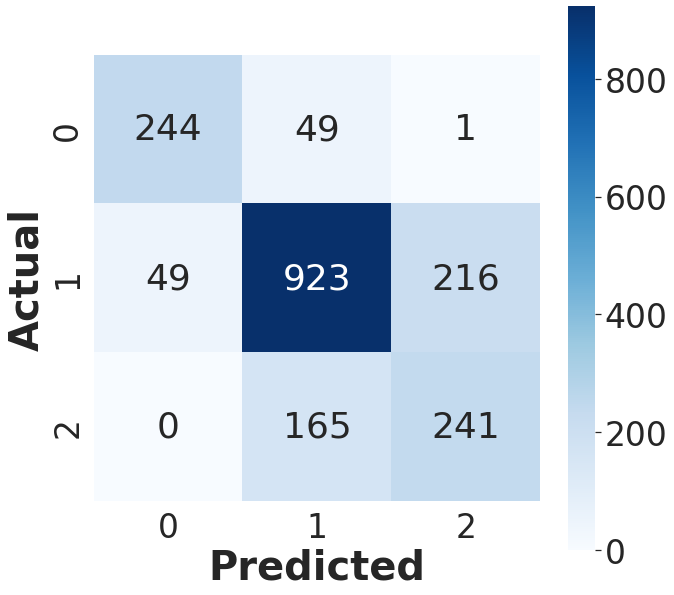

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_labeltrue,y_labelpred)
plt.figure(figsize=(10, 10))
sns.set(font_scale=3)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'g',xticklabels=['0','1','2'], yticklabels=['0','1','2'])
ax.set_ylabel('Actual', fontsize=40 ,fontweight = 'bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight = 'bold')